<a href="https://colab.research.google.com/github/Term1nato/AQI/blob/main/pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [ ]:
#Importing the dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\Study\6th sem\pd lab\city_day.csv",encoding='latin1')

FileNotFoundError: ignored

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#We drop the Xylene column as it has too many NULL values
#We extract out the year and month data
def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])

    df['Year'] = [d.year for d in df['Date']]
    df['Month'] = [d.month for d in df['Date']]

    df.dropna(subset = ['AQI'],inplace = True)
    df = df.drop(['Xylene'],axis = 1)

    return df

In [ ]:
df = preprocessing(df)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6


[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'PM10'),
 Text(2.5, 0, 'NO'),
 Text(3.5, 0, 'NO2'),
 Text(4.5, 0, 'NOx'),
 Text(5.5, 0, 'NH3'),
 Text(6.5, 0, 'CO'),
 Text(7.5, 0, 'SO2'),
 Text(8.5, 0, 'O3'),
 Text(9.5, 0, 'Benzene'),
 Text(10.5, 0, 'Toluene'),
 Text(11.5, 0, 'AQI')]

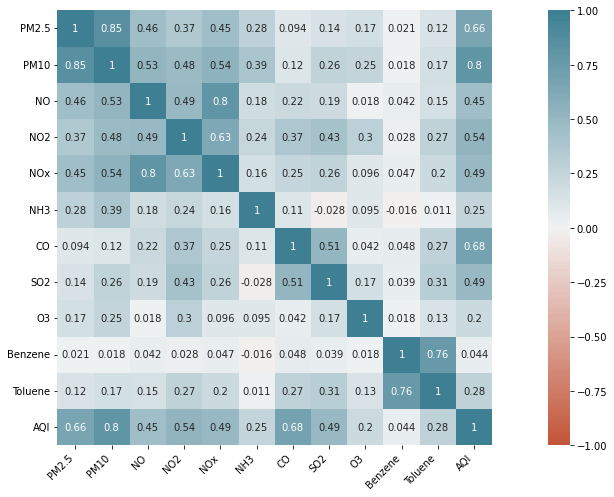

In [ ]:
df_corr = df.corr()
df_corr = df_corr.drop(['Year','Month'],axis = 1)
df_corr = df_corr.drop(['Year','Month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
#List of cities for which we have the data
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
#Read the daily city-wise data
df= pd.read_csv(r"C:\Users\USER\Desktop\Study\6th sem\pd lab\city_day.csv",encoding='latin1',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Keeping only the columns needed
df=df[['City','Date','AQI']]

In [ ]:
#Filtering the dataframe to keep the data for the city of Delhi only
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [ ]:
delhi

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0
...,...
2020-06-27,112.0
2020-06-28,196.0
2020-06-29,233.0


In [ ]:
#Fill NULL DATA
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [ ]:
#Taking monthly average
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

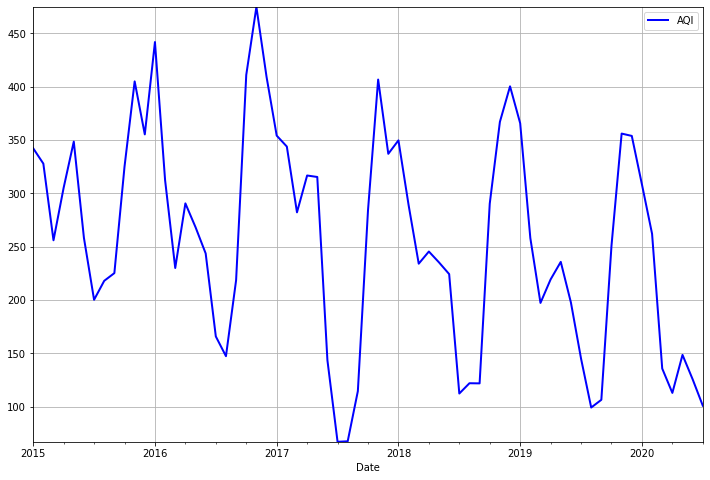

In [ ]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Blue')
ax.autoscale(enable=True, axis='both', tight=True)

FORECASTING

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

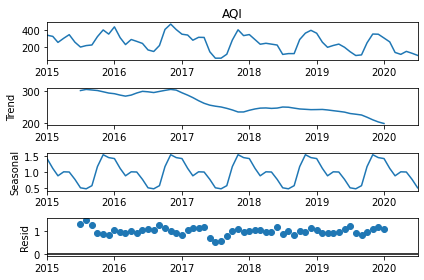

In [ ]:
delhi_AQI=delhi['AQI']
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

SARIMAX MODEL

In [ ]:
#Importing the SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
len(delhi_AQI)

67

In [ ]:
#Splitting the training and testing dataset
train=delhi_AQI[:48]
test=delhi_AQI[48:61]

In [ ]:
#Defining our model and fitting on the training data
model=SARIMAX(train,order=(0,1,3),seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   48
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -185.444
Date:                              Thu, 10 Mar 2022   AIC                            380.888
Time:                                      16:00:12   BIC                            388.665
Sample:                                  01-01-2015   HQIC                           383.573
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5591      8.218     -0.068      0.946     -16.666      15.547
ma.L2         -0.0813      3.649     -0.022      0.982      -7.233       7.070
ma.L3         -0.3558      3.085     -0.115      0.908      -6.402       5.690
ma.S.L12      -0.9978    122.947     -0.008      0.994    -241.970     239.975
sigma2      1325.8329   1.62e+05      0.008      0.993   -3.17e+05    3.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.43   Prob(JB):                         0.89
Heteroskedasticity (H):               0.54   Skew:                             0.20
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predicting on our train and test dataset
train_predictions = results.predict(start=1, end=48, typ='levels').rename('Predictions')
test_predictions = results.predict(start=48, end=60, typ='levels').rename('Predictions')

<AxesSubplot:xlabel='Date'>

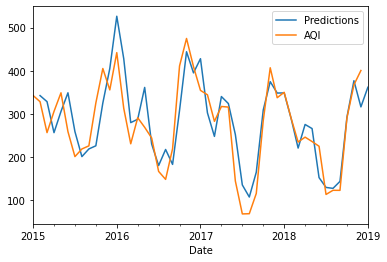

In [ ]:
#Plotting the train predictions to see the fit of the model
train_predictions.plot(legend=True)
train.plot(legend=True)

In [ ]:
#Calculating the RMSE value on the training dataset
RMSE=np.sqrt(mean_squared_error(train_predictions,train))
print('RMSE = ',RMSE)
print('Mean AQI',train.mean())

RMSE =  66.39476511295446
Mean AQI 275.1711046334552


<AxesSubplot:xlabel='Date'>

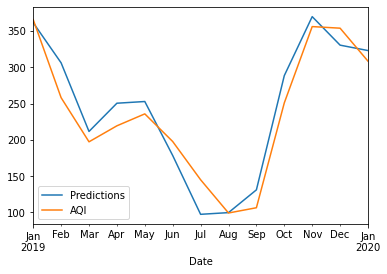

In [ ]:
#Plotting the test predictions to see how well our model generalized
test_predictions.plot(legend=True)
test.plot(legend=True)

In [ ]:
#Calculating the RMSE value on the testing dataset
RMSE=np.sqrt(mean_squared_error(test_predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  26.8770462682321
Mean AQI 238.0504608294931


<AxesSubplot:xlabel='Date'>

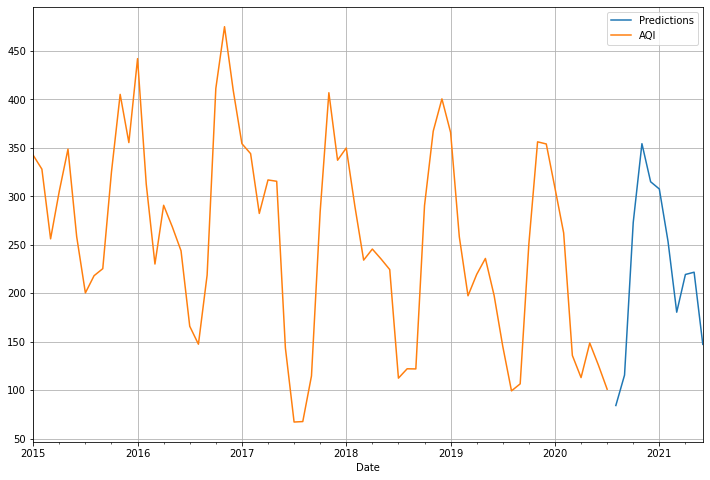

In [ ]:
#Obtaining predicted values:
future_predictions = results.predict(start=67, end=77, typ='levels').rename('Predictions')

#Plotting predicted values against the true values:
future_predictions.plot(legend=True)
delhi_AQI.plot(legend=True,figsize=(12,8),grid=True)

GRID search framework for fine tuning the model

In [ ]:
def grid_search(p,d,q,P,D,Q,m,train,test):

    column_names = ['p','d','q','P','D','Q','m','RMSE_train','RMSE_test']
    df = pd.DataFrame(columns = column_names)

    for p1 in p:
        for p2 in d:
            for p3 in q:
                for p4 in P:
                    for p5 in D:
                        for p6 in Q:
                            for p7 in m:


                                model=SARIMAX(train,order=(p1,p2,p3),seasonal_order=(p4,p5,p6,p7))
                                try:
                                    results=model.fit()
                                except:
                                    print("Passing on : " + str(p1) + " " + str(p2) + " " + str(p3) + " " + str(p4) + " " + str(p5) + " " + str(p6) + " " + str(p7))
                                    pass
                                print("Fitting on : " + str(p1) + " " + str(p2) + " " + str(p3) + " " + str(p4) + " " + str(p5) + " " + str(p6) + " " + str(p7))
                                #results.summary()
                                #Predicting on our train and test dataset
                                train_predictions = results.predict(start=1, end=48, typ='levels').rename('Predictions')
                                test_predictions = results.predict(start=48, end=60, typ='levels').rename('Predictions')

                                #Calculating the RMSE value on the training dataset
                                RMSE_train = np.sqrt(mean_squared_error(train_predictions,train))
                                #Calculating the RMSE value on the testing dataset
                                RMSE_test=np.sqrt(mean_squared_error(test_predictions,test))

                                #Fill our dataframe
                                df = df.append({'p':p1, 'd':p2,'q':p3,
                                                'P':p4,'D':p5,'Q':p6,'m':p7,
                                                'RMSE_train' : RMSE_train, 'RMSE_test' : RMSE_test},
                                               ignore_index = True)
                                print(df.tail(1))



    return df

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.impute import SimpleImputer
train=delhi_AQI[:48]
test=delhi_AQI[48:61]

p = [1,2,3,0]
d = [1,2,3,0]
q = [1,2,3,0]
P = [1,2,3,0]
D = [1,2,3,0]
Q = [1,2,3,0]
m = [12]

table = grid_search(p,d,q,P,D,Q,m,train,test)

Fitting on : 1 1 1 1 1 1 12
     p    d    q    P    D    Q     m RMSE_train  RMSE_test
0  1.0  1.0  1.0  1.0  1.0  1.0  12.0  62.975715  37.275076
Fitting on : 1 1 1 1 1 2 12
     p    d    q    P    D    Q     m RMSE_train  RMSE_test
1  1.0  1.0  1.0  1.0  1.0  2.0  12.0  63.134903  46.602762
Fitting on : 1 1 1 1 1 3 12
     p    d    q    P    D    Q     m RMSE_train  RMSE_test
2  1.0  1.0  1.0  1.0  1.0  3.0  12.0  62.958002  44.396405
Fitting on : 1 1 1 1 1 0 12
     p    d    q    P    D    Q     m RMSE_train  RMSE_test
3  1.0  1.0  1.0  1.0  1.0  0.0  12.0   66.41462  44.756889
Fitting on : 1 1 1 1 2 1 12
     p    d    q    P    D    Q     m  RMSE_train  RMSE_test
4  1.0  1.0  1.0  1.0  2.0  1.0  12.0  113.461646  66.654663
Fitting on : 1 1 1 1 2 2 12
     p    d    q    P    D    Q     m  RMSE_train  RMSE_test
5  1.0  1.0  1.0  1.0  2.0  2.0  12.0  113.490215  59.132081
Fitting on : 1 1 1 1 2 3 12
     p    d    q    P    D    Q     m RMSE_train  RMSE_test
6  1.0  1.0  1.0  1.

In [ ]:
table

In [ ]:
table.to_csv("grid-search-results.csv")